# 编程作业 5 - 偏差和方差

这次练习我们将会看到如何使用课上的方法改进机器学习算法，包括过拟合、欠拟合的的状态判断以及学习曲线的绘制。

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data():
    """for ex5
    d['X'] shape = (12, 1)
    pandas has trouble taking this 2d ndarray to construct a dataframe, so I ravel
    the results
    """
    d = sio.loadmat('ex5data1.mat')
    return map(np.ravel, [d['X'], d['y'], d['Xval'], d['yval'], d['Xtest'], d['ytest']])

In [3]:
X, y, Xval, yval, Xtest, ytest = load_data()

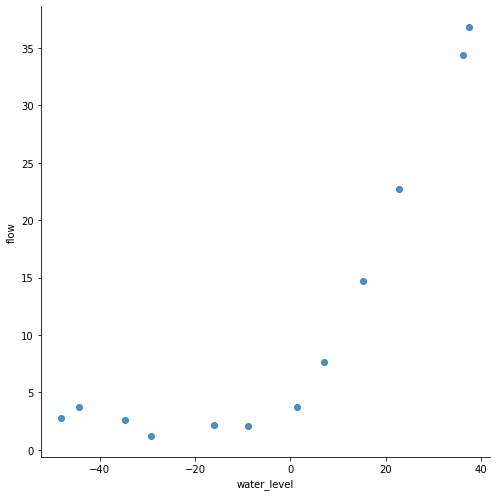

In [4]:
df = pd.DataFrame({'water_level':X, 'flow':y})

sns.lmplot(x = 'water_level', y = 'flow', data=df, fit_reg=False, height=7)
plt.show()

In [5]:
X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]
X.shape, Xval.shape, Xtest.shape

((12, 2), (21, 2), (21, 2))

# 代价函数
<img style="float: left;" src="img/linear_cost.png">

In [6]:
def cost(theta, X, y):
# INPUT：参数值theta，数据X,标签y
# OUTPUT：当前参数值下代价函数
# TODO：根据参数和输入的数据计算代价函数
    
    # STEP1：获取样本个数
    # your code here  (appro ~ 1 lines)
    m = X.shape[0]
    
    # STEP2：计算代价函数
    # your code here  (appro ~ 3 lines)
    inner = X @ theta - y
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

In [7]:
theta = np.ones(X.shape[1])
cost(theta, X, y)

303.9515255535976

# 梯度
<img style="float: left;" src="img/linear_gradient.png">

In [8]:
def gradient(theta, X, y):
# INPUT：参数值theta，数据X,标签y
# OUTPUT：当前参数值下梯度
# TODO：根据参数和输入的数据计算梯度  
    
    # STEP1：获取样本个数
    # your code here  (appro ~ 1 lines)
    m = X.shape[0]
    
    # STEP2：计算代价函数
    # your code here  (appro ~ 1 lines)
    
    grad=  (X.T @ (X @ theta - y))/m
    return grad

In [9]:
gradient(theta, X, y)

array([-15.30301567, 598.16741084])

# 正则化梯度与代价函数
<img style="float: left;" src="img/linear_reg_gradient.png">

In [10]:
def regularized_gradient(theta, X, y, l=1):
# INPUT：参数值theta，数据X,标签y
# OUTPUT：当前参数值下梯度
# TODO：根据参数和输入的数据计算梯度 
    
    # STEP1：获取样本个数
    # your code here  (appro ~ 1 lines)
    m = X.shape[0]
    
    # STEP2：计算正则化梯度
    regularized_term = theta.copy()  # same shape as theta
    regularized_term[0] = 0  # don't regularize intercept theta
    # your code here  (appro ~ 1 lines)
    regularized_term = (l / m) * regularized_term

    return gradient(theta, X, y) + regularized_term

In [11]:
regularized_gradient(theta, X, y)

array([-15.30301567, 598.25074417])

In [12]:
def regularized_cost(theta, X, y, l=1):
    m = X.shape[0]

    regularized_term = (l / (2 * m)) * np.power(theta[1:], 2).sum()

    return cost(theta, X, y) + regularized_term

# 拟合数据
> 正则化项 $\lambda=0$

In [13]:
def linear_regression_np(X, y, l=1):
# INPUT：数据X,标签y，正则化参数l
# OUTPUT：当前参数值下梯度
# TODO：根据参数和输入的数据计算梯度 
    # STEP1：初始化参数
    theta = np.ones(X.shape[1])
    
    # STEP2：调用优化算法拟合参数
    # your code here  (appro ~ 1 lines)
    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    return res


In [14]:
theta = np.ones(X.shape[0])

final_theta = linear_regression_np(X, y, l=0).get('x')

final_theta


  NIT   NF   F                       GTG
    0    1  3.039515255535976E+02   3.58038434E+05
tnc: fscale = 0.000835613
    1    3  9.299577620594806E+01   1.36988337E+02
tnc: fscale = 0.0427197
    2    5  4.008670401834715E+01   2.25224917E+04
    3    7  2.237390649510906E+01   6.62767544E-11
tnc: fscale = 61417.1
tnc: |fn-fn-1] = 4.17007e-14 -> convergence
    4    9  2.237390649510901E+01   2.10473664E-13
tnc: Converged (|f_n-f_(n-1)| ~= 0)


array([13.08790398,  0.36777923])

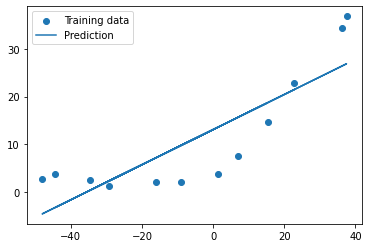

In [15]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(X[:,1], y, label="Training data")
plt.plot(X[:, 1], X[:, 1]*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()

In [16]:
training_cost, cv_cost = [], []

1.使用训练集的子集来拟合应模型

2.在计算训练代价和交叉验证代价时，没有用正则化

3.记住使用相同的训练集子集来计算训练代价

TIP：向数组里添加新元素可使用append函数

In [17]:
# TODO：计算训练代价和交叉验证集代价
# STEP1：获取样本个数，遍历每个样本
m = X.shape[0]
for i in range(1, m+1):
    # STEP2：计算当前样本的代价
    res = linear_regression_np(X[:i, :], y[:i], l=0)
    # your code here  (appro ~ 2 lines)
    tc = regularized_cost(res.x, X[:i, :], y[:i], l=0)
    cv = regularized_cost(res.x, Xval, yval, l=0)
    
    # STEP3：把计算结果存储至预先定义的数组training_cost, cv_cost中
    # your code here  (appro ~ 2 lines)
    training_cost.append(tc)
    cv_cost.append(cv)
    

  NIT   NF   F                       GTG
    0    1  1.457106922645887E+02   7.43067003E+04
tnc: fscale = 0.00183424
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: |pg| = 3.61706e-05 -> local minimum
    1    3  8.631534185484672E-18   4.40174166E-15
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.878623740891748E+02   3.18073041E+05
tnc: fscale = 0.000886557
    1    3  2.004821342908418E-01   3.16698305E-02
tnc: fscale = 2.80962
    2    5  1.406351957438132E-04   1.55393840E-01
    3    7  8.371044654825317E-18   7.81622440E-18
tnc: |pg| = 9.95065e-10 -> local minimum
    3    7  8.371044654825317E-18   7.81622440E-18
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.932434806358119E+02   1.68157035E+05
tnc: fscale = 0.00121931
    1    3  8.863206576484284E+01   1.68991143E+02
tnc: fscale = 0.0384625
    2    5  4.163125460796083E+01   3.39442090E+04
    3    7  3.286595045501299E+00   2.32

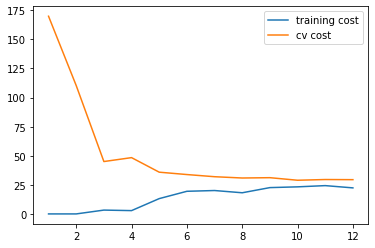

In [18]:
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), cv_cost, label='cv cost')
plt.legend(loc=1)
plt.show()

这个模型拟合不太好, **欠拟合了**

# 创建多项式特征

In [19]:
def prepare_poly_data(*args, power):
    """
    args: keep feeding in X, Xval, or Xtest
        will return in the same order
    """
    def prepare(x):
        # 特征映射
        df = poly_features(x, power=power)

        # 归一化处理
        ndarr = normalize_feature(df).values

        # 添加偏置项
        return np.insert(ndarr, 0, np.ones(ndarr.shape[0]), axis=1)

    return [prepare(x) for x in args]

In [20]:
def poly_features(x, power, as_ndarray=False):  #特征映射
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power + 1)}
    df = pd.DataFrame(data)

    return df.values if as_ndarray else df


In [21]:
X, y, Xval, yval, Xtest, ytest = load_data()

In [22]:
poly_features(X, power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


# 准备多项式回归数据
1. 扩展特征到 8阶,或者你需要的阶数
2. 使用 **归一化** 来合并 $x^n$ 
3. 不要忘记添加偏置项

In [23]:
def normalize_feature(df):
    """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [24]:
X_poly, Xval_poly, Xtest_poly= prepare_poly_data(X, Xval, Xtest, power=8)
X_poly[:3, :]

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

# 画出学习曲线
> 首先，我们没有使用正则化，所以 $\lambda=0$

In [25]:
def plot_learning_curve(X, y, Xval, yval, l=0):
# INPUT：训练数据集X,y，交叉验证集Xval，yval，正则化参数l
# OUTPUT：当前参数值下梯度
# TODO：根据参数和输入的数据计算梯度 
    
    # STEP1：初始化参数，获取样本个数，开始遍历
    training_cost, cv_cost = [], []
    m = X.shape[0]
    for i in range(1, m + 1):
        # STEP2：调用之前写好的拟合数据函数进行数据拟合
        # your code here  (appro ~ 1 lines)
        res = linear_regression_np(X[:i, :], y[:i], l=l)
        # STEP3：计算样本代价
        # your code here  (appro ~ 1 lines)
        tc = cost(res.x, X[:i, :], y[:i])
        cv = cost(res.x, Xval, yval)
        # STEP3：把计算结果存储至预先定义的数组training_cost, cv_cost中
        # your code here  (appro ~ 2 lines)
        training_cost.append(tc)
        cv_cost.append(cv)

        

    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    plt.legend(loc=1)


  NIT   NF   F                       GTG
    0    1  5.196208292205368E+00   3.17343613E+01
    1    3  1.004694523695014E-18   6.13588548E-18
tnc: |pg| = 2.47707e-09 -> local minimum
    1    3  1.004694523695014E-18   6.13588548E-18
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  3.686037992896324E+00   1.74005107E+01
    1    4  5.492158255930897E-17   4.07058700E-17
tnc: |pg| = 6.38012e-09 -> local minimum
    1    4  5.492158255930897E-17   4.07058700E-17
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.364046313185939E+02   5.94961274E+02
tnc: fscale = 0.0204987
    1    4  6.000560296488119E-01   2.63211166E-01
tnc: fscale = 0.974581
    2    8  2.418116214574375E-17   1.02553101E-16
tnc: |pg| = 1.0391e-08 -> local minimum
    2    8  2.418116214574375E-17   1.02553101E-16
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.141362053785440E+02   1.49259859E+0

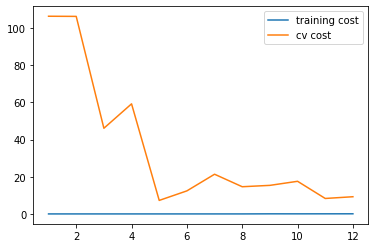

In [26]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=0)
plt.show()

你可以看到训练的代价太低了，不真实. 这是 **过拟合**了

# try $\lambda=1$

  NIT   NF   F                       GTG
    0    1  9.196208292205368E+00   5.32057794E+01
    1    4  7.266489238927187E-03   3.84114407E-03
    2    7  7.439856535596993E-05   1.90689941E-04
tnc: fscale = 36.2081
    3   11  1.289726173983063E-20   9.10303469E-20
tnc: |pg| = 8.33272e-12 -> local minimum
    3   11  1.289726173983063E-20   9.10303469E-20
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  5.686037992896324E+00   2.47635192E+01
    1    4  8.395887460059227E-02   4.75160995E-03
    2    8  7.270184483640099E-02   7.52954398E-06
tnc: fscale = 182.216
    3   11  7.269436292980898E-02   1.85509889E-08
tnc: fscale = 3671.02
tnc: |fn-fn-1] = 7.40327e-09 -> convergence
    4   15  7.269435552653472E-02   1.42243917E-12
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.377379646519273E+02   5.66672779E+02
tnc: fscale = 0.0210041
    1    4  1.939519357400691E+01   1.40114948E+00
tnc: fscale = 0.42

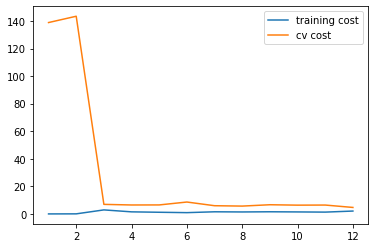

In [27]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=1)
plt.show()


训练代价增加了些，不再是0了。
也就是说我们减轻**过拟合**

# try $\lambda=100$

  NIT   NF   F                       GTG
    0    1  4.051962082922054E+02   8.13788762E+04
tnc: fscale = 0.00175273
    1    4  5.832091076024397E-01   1.33251835E+00
tnc: fscale = 0.433145
    2    8  6.834158070274397E-18   1.13649621E-15
tnc: |pg| = 7.78306e-08 -> local minimum
    2    8  6.834158070274397E-18   1.13649621E-15
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.036860379928963E+02   2.05537014E+04
tnc: fscale = 0.00348759
    1    4  2.831008435195471E-01   3.56301816E-01
tnc: fscale = 0.837647
    2    8  1.147779356625167E-01   8.55453124E-09
tnc: fscale = 5405.95
tnc: |fn-fn-1] = 8.51076e-11 -> convergence
    3   11  1.147779355774091E-01   1.40281331E-18
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  2.697379646519273E+02   6.56611179E+03
tnc: fscale = 0.00617044
    1    4  1.433800288330111E+02   9.90612960E+02
    2    7  1.127877217867033E+02   3.29528542E-01
tnc: fscale = 0.

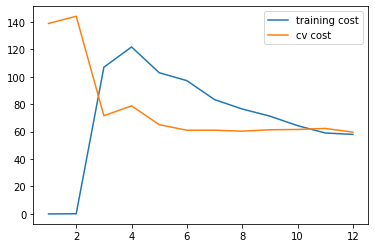

In [28]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=100)
plt.show()

太多正则化了.  
变成 **欠拟合**状态

# 找到最佳的 $\lambda$

In [29]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []

In [30]:
for l in l_candidate:
    res = linear_regression_np(X_poly, y, l)
    
    tc = cost(res.x, X_poly, y)
    cv = cost(res.x, Xval_poly, yval)
    
    training_cost.append(tc)
    cv_cost.append(cv)

  NIT   NF   F                       GTG
    0    1  1.046321620777135E+02   3.09396153E+02
tnc: fscale = 0.0284258
    1    5  2.059429563982655E+00   5.93770564E-01
tnc: fscale = 0.648874
    2    9  9.713650915337676E-01   1.44363252E+00
    3   13  4.278498792421015E-01   2.51847215E-03
    4   18  2.422844046013120E-01   5.25402457E-05
tnc: fscale = 68.9801
    5   23  1.995427340518479E-01   1.38104221E-04
    6   28  1.932839463550512E-01   4.00911572E-03
    7   33  1.804348594143145E-01   4.20896034E-03
    8   36  1.778282399261132E-01   1.99747228E-04
    9   41  1.770073289328435E-01   1.19596160E-04
   10   46  1.751547181924394E-01   6.79177492E-04
   11   51  1.607910531176744E-01   1.75467436E-03
tnc: stepmx = 1000
   12   56  1.035467803015249E-01   1.44238115E-03
   13   61  9.871964341495985E-02   5.96763817E-04
   14   66  9.464493469392658E-02   4.42209075E-05
   15   71  9.198363249989409E-02   1.33364083E-03
   16   74  9.054279840976592E-02   1.28854817E-03
   1

    2    8  3.337220396391762E+01   3.71723589E-06
tnc: fscale = 259.334
    3   12  3.337220290489221E+01   2.28611696E-09
tnc: fscale = 10457.3
tnc: |fn-fn-1] = 1.23294e-09 -> convergence
    4   15  3.337220290365927E+01   1.54935002E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)


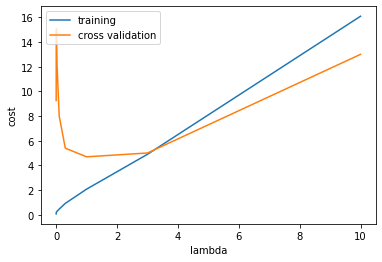

In [31]:
plt.plot(l_candidate, training_cost, label='training')
plt.plot(l_candidate, cv_cost, label='cross validation')
plt.legend(loc=2)

plt.xlabel('lambda')

plt.ylabel('cost')
plt.show()

In [32]:
# best cv I got from all those candidates
l_candidate[np.argmin(cv_cost)]

1

In [33]:
# use test data to compute the cost
for l in l_candidate:
    theta = linear_regression_np(X_poly, y, l).x
    print('test cost(l={}) = {}'.format(l, cost(theta, Xtest_poly, ytest)))

  NIT   NF   F                       GTG
    0    1  1.046321620777135E+02   3.09396153E+02
tnc: fscale = 0.0284258
    1    5  2.059429563982655E+00   5.93770564E-01
tnc: fscale = 0.648874
    2    9  9.713650915337676E-01   1.44363252E+00
    3   13  4.278498792421015E-01   2.51847215E-03
    4   18  2.422844046013120E-01   5.25402457E-05
tnc: fscale = 68.9801
    5   23  1.995427340518479E-01   1.38104221E-04
    6   28  1.932839463550512E-01   4.00911572E-03
    7   33  1.804348594143145E-01   4.20896034E-03
    8   36  1.778282399261132E-01   1.99747228E-04
    9   41  1.770073289328435E-01   1.19596160E-04
   10   46  1.751547181924394E-01   6.79177492E-04
   11   51  1.607910531176744E-01   1.75467436E-03
tnc: stepmx = 1000
   12   56  1.035467803015249E-01   1.44238115E-03
   13   61  9.871964341495985E-02   5.96763817E-04
   14   66  9.464493469392658E-02   4.42209075E-05
   15   71  9.198363249989409E-02   1.33364083E-03
   16   74  9.054279840976592E-02   1.28854817E-03
   1

test cost(l=0) = 9.799399498688892
test cost(l=0.001) = 11.054987989655938
test cost(l=0.003) = 11.249198861537243
test cost(l=0.01) = 10.879605199670008
test cost(l=0.03) = 10.022734920552129
test cost(l=0.1) = 8.632060998872074
test cost(l=0.3) = 7.336602384055533
test cost(l=1) = 7.46630349664086
test cost(l=3) = 11.643928200535115
test cost(l=10) = 27.715080216719304


   10   45  3.851607265614391E-01   1.65618299E-06
   11   50  3.851116540554509E-01   1.41108950E-06
   12   55  3.850820849853748E-01   1.25122753E-05
   13   58  3.850709805105951E-01   8.17574900E-06
   14   62  3.850649063924307E-01   6.70258177E-08
tnc: fscale = 1931.3
   15   67  3.850644879149120E-01   4.59733074E-08
   16   70  3.850644499282627E-01   5.36737594E-08
   17   75  3.850632299793768E-01   1.43255814E-06
   18   78  3.850630937771271E-01   1.54193807E-09
   19   83  3.850629487671742E-01   1.99316948E-09
tnc: |fn-fn-1] = 2.23421e-09 -> convergence
   20   88  3.850629465329676E-01   5.82291992E-10
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.046421620777136E+02   3.09285357E+02
tnc: fscale = 0.0284309
    1    5  2.314828554565685E+00   6.14023890E-01
tnc: fscale = 0.638083
    2    9  1.229250899022202E+00   1.11360663E+00
    3   13  7.731910540325062E-01   1.56934994E-03
    4   18  6.723584125123594E-01   1.91444440

调参后， $\lambda = 0.3$ 是最优选择，这个时候测试代价最小